# DATA SCIENCE JOB MARKET ANALYSIS

## 2. Pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Now it is time to read the file we have generated.

In [ ]:
# To read the csv file you generated, just simply change the name of file below.
DS_jobs_df=pd.read_csv("DataScience_jobs.csv", index_col=0)
print(len(DS_jobs_df))
DS_jobs_df.tail(5)

1009


,companies,locations,experience,skills
roles,,,,
Data Scientist,Zenith Consultants Software,"Hyderabad, Gurugram",8-13 Yrs,"Tensorflow, Pytorch, data scientist, Tableau, ..."
Senior Analyst/Data Scientist - NLP/GenAI,Zetwerk,"Hyderabad, Chennai, Bengaluru",4-6 Yrs,"Health insurance, Automation, Business transfo..."
Data Scientist (Cyber security domain),Kiash Solution Llp,"Gurugram, Chennai",4-6 Yrs,"Data scientist, Pyspark, big data, Machine Lea..."
"Data Scientist with Python, Artificial intelligence, Machine Learning",I,Chennai,4-6 Yrs,"Data Scientist, AI, Machine Learning, Python, ..."
Data and Computational Biology Scientist,Feathersoft Info Solutions,"Kochi, Chennai",2-5 Yrs,"Data analysis, Data management, Analytical, Ma..."


In [38]:
# To read the csv file you generated, just simply change the name of file below.
DS_jobs_df=pd.read_csv("DataScience_jobs.csv")
print(len(DS_jobs_df))
DS_jobs_df.tail(5)

1009


,roles,companies,locations,experience,skills
1004,Data Scientist,Zenith Consultants Software,"Hyderabad, Gurugram",8-13 Yrs,"Tensorflow, Pytorch, data scientist, Tableau, ..."
1005,Senior Analyst/Data Scientist - NLP/GenAI,Zetwerk,"Hyderabad, Chennai, Bengaluru",4-6 Yrs,"Health insurance, Automation, Business transfo..."
1006,Data Scientist (Cyber security domain),Kiash Solution Llp,"Gurugram, Chennai",4-6 Yrs,"Data scientist, Pyspark, big data, Machine Lea..."
1007,"Data Scientist with Python, Artificial intelli...",I,Chennai,4-6 Yrs,"Data Scientist, AI, Machine Learning, Python, ..."
1008,Data and Computational Biology Scientist,Feathersoft Info Solutions,"Kochi, Chennai",2-5 Yrs,"Data analysis, Data management, Analytical, Ma..."


In [39]:
#lets check if our data have any null values
DS_jobs_df.isna().sum()

roles          6
companies     10
locations     10
experience    16
skills        16
dtype: int64

In [40]:
#lets drop the missing values
DS_jobs_df=DS_jobs_df.dropna()

In [41]:
#lets check if our data have any dupplicate data
#DS_jobs_df.reset_index(inplace=True)
DS_jobs_df[DS_jobs_df.duplicated(subset=["roles","companies","locations","skills"])].shape

(29, 5)

In [42]:
print("Before dropping duplicates : ",DS_jobs_df.shape)
DS_jobs_df.drop_duplicates(keep="first",inplace=True)
print("After dropping duplicates : ", DS_jobs_df.shape)

Before dropping duplicates :  (993, 5)
After dropping duplicates :  (969, 5)


In [43]:
#lets lower case all the strings to avoid redundancy
DS_jobs_df=DS_jobs_df.apply(lambda x: x.astype(str).str.lower())

#there are more than one location and skill are attcahed to each job, so lets split locations and jobs.
DS_jobs_df.locations=[location.split(",") for location in DS_jobs_df.locations]
DS_jobs_df[15:20]

,roles,companies,locations,experience,skills
21,data scientist,sasken technologies,"[kolkata, mumbai, new delhi, hyderabad, pu...",8-12 yrs,"unix, computer vision, sas, machine learning, ..."
22,data scientist,upl limited,[bengaluru],3-6 yrs,"semantic, algorithms, data, nltk, artificial i..."
23,data scientist,wipro,[bengaluru],3-5 yrs,"python, machine learning, deep learning, tenso..."
24,"data scientist (python, genai)",capgemini,"[hybrid - mumbai, pune, bengaluru]",6-9 yrs,"data science, ai/ml, architect and developer, ..."
50,data scientist,idexcel,"[chennai, bengaluru]",4-8 yrs,"pytorch, natural language processing, machine ..."


## 3. Exploratory Data analysis

### 3.1. Location wise Data science jobs


In [44]:
# link of differnt collor pallets: https://matplotlib.org/stable/users/explain/colors/colormaps.html
colors = plt.cm.Set3.colors[:15]  # You can try 'Accent', 'tab10', or 'Dark2' for variety.


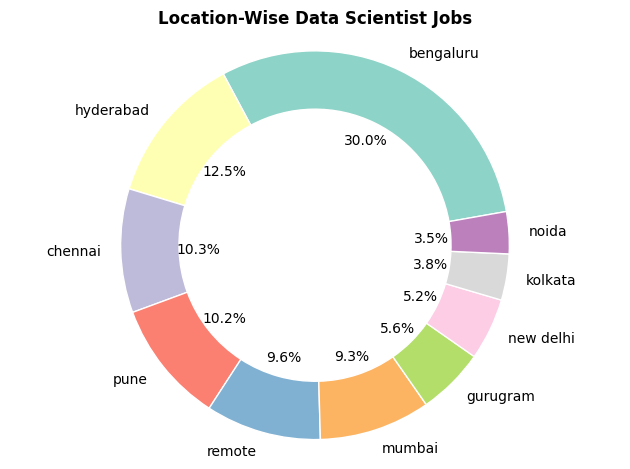

In [45]:
# Top 10 Locations with Most Data Scientist Jobs
location_counts = DS_jobs_df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10]

# Plotting a donut-style pie chart
plt.pie(
    location_counts,
    colors = colors,
    labels=location_counts.index,
    startangle=10,
    autopct='%1.1f%%',
    wedgeprops=dict(width=0.3, edgecolor='w')
)

plt.title("Location-Wise Data Scientist Jobs", weight='bold')

# Add a white circle at the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.60, fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Ensure the pie is drawn as a circle
plt.tight_layout()
plt.show()


##### Observations:
1. Bangalore tops the list with almost 30% of the total jobs.
2. Top three cities Bangalore, Hyderabad and Chennai constitues more than 50% of the total jobs.

### 3.2 Companies with more Data science openings

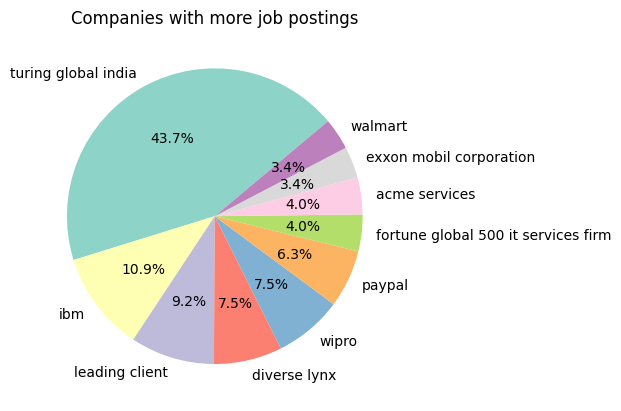

In [46]:
company_count = DS_jobs_df["companies"].value_counts()[:10]
plt.pie(company_count, 
        labels=company_count.index,  #labels
        startangle=40, 
        colors=colors, 
        autopct='%1.1f%%')
plt.title("Companies with more job postings")
plt.show()

#### Observations:
1. Turing Global India tops the list with 43% of the total job listings.
2. there are quite a few consultancies activey recruiting for their clients.

### 3.3 Data Scientist roles in demand

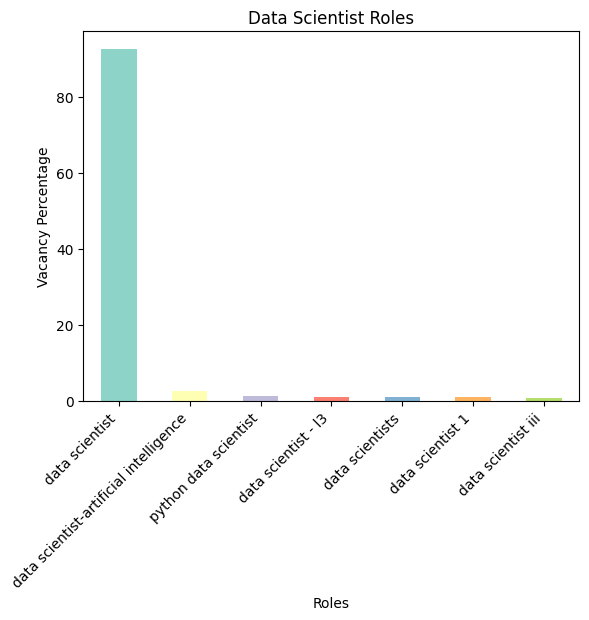

In [47]:
# Calculate the percentage of each role
role_counts = DS_jobs_df["roles"].value_counts()[:7]
role_percentages = role_counts / role_counts.sum() * 100

# Plot the bar chart with percentages
role_percentages.plot.bar(color=colors)

# Customize the chart
plt.xticks(rotation=45, ha='right')
plt.title("Data Scientist Roles")
plt.ylabel("Vacancy Percentage", rotation=90)
plt.xlabel("Roles")
plt.show()


#### Observations:
1. Data science roles are mostly termed with data scientist role.

### 3.4. Desired Experience for Data science jobs

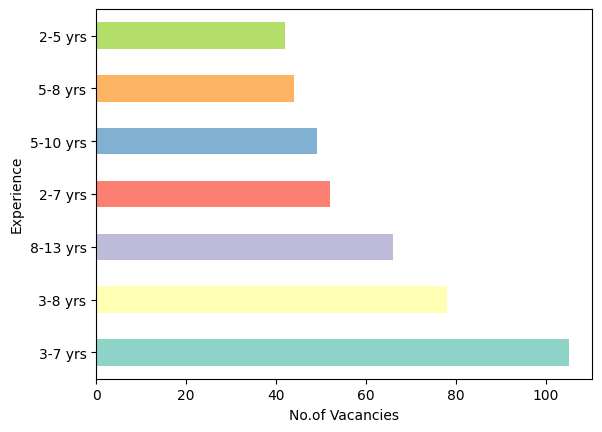

In [48]:
experience_count = DS_jobs_df["experience"].value_counts()[:7]
experience_count.plot.barh(color=colors)
plt.xlabel("No.of Vacancies")
plt.ylabel("Experience")
plt.show()

#### Observations:
1. There seems to more vacancies for people with a medior/senior level.
2. Candidates with atleast 3 years of experience have a fair opportunities.

### 3.5. Skills required for a Data science job

In [49]:
# Tokenizing  skills columns
#  Step 1: Split comma-separated strings into individual skills USING .str.split(',')
# Step 2: Explode to get one skill per row USING .explode()
# Step 3: Drop the spaces USING .str.strip()
skills_data = DS_jobs_df['skills'].str.split(',').explode().str.strip()

# Top 7 most required skills in jab market.
top_skills = skills_data.value_counts().head(20)
print(top_skills)


skills
machine learning               579
python                         335
data science                   308
data analysis                  206
sql                            205
analytical                     163
natural language processing    158
computer science               127
data                           124
artificial intelligence        122
deep learning                  120
data mining                    113
analytics                      106
machine                         84
gcp                             74
data visualization              72
computer vision                 61
predictive modeling             60
data scientist                  59
programming                     58
Name: count, dtype: int64


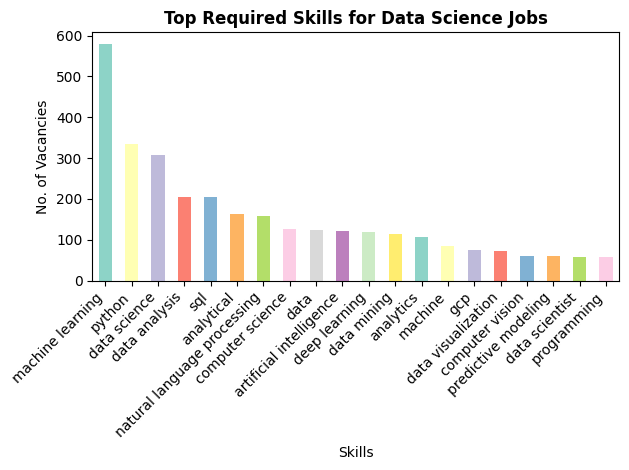

In [50]:
# Plot
top_skills.plot(kind="bar", color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel("No. of Vacancies")
plt.xlabel("Skills")
plt.title("Top Required Skills for Data Science Jobs", weight='bold')
plt.tight_layout()
plt.show()


#### Observations:
1. looks clumsy right lets break it down, the reason i included top 30 skills beacuse of the vast fields covered by Data science.
2. we will go one by one sub fields and compare their peers in that to get the better understanding.

In [51]:
#lets convert the skills column into a seperate DataFrame, which makes things easy for further analysis.
skl_df=pd.DataFrame(DS_jobs_df.skills.apply(pd.Series).stack().value_counts()).reset_index()
skl_df.columns=["skills","count"]
skl_df.head()

,skills,count
0,data scientist,13
1,"algorithms, python, modeling, data analysis, d...",9
2,"data science, gcp, natural language processing...",4
3,"natural language processing, cnn, artificial i...",4
4,"team management, machine learning, deep learni...",4


In [52]:
print(top_skills)

skills
machine learning               579
python                         335
data science                   308
data analysis                  206
sql                            205
analytical                     163
natural language processing    158
computer science               127
data                           124
artificial intelligence        122
deep learning                  120
data mining                    113
analytics                      106
machine                         84
gcp                             74
data visualization              72
computer vision                 61
predictive modeling             60
data scientist                  59
programming                     58
Name: count, dtype: int64


### 3.5.1. Must Have Skills

In [21]:
#lets first find the top skills for Data science in general
# Extra material for regular expression: https://regexlearn.com/
datascience={}
datascience['statistics']=skl_df["count"][skl_df['skills'].str.contains('stat', regex=True)].sum()
datascience['machine_learning']=skl_df["count"][skl_df['skills'].str.contains('machine |^ml', regex=True)].sum()
datascience['data_analysis']=skl_df["count"][skl_df['skills'].str.contains('data ana', regex=True)].sum()
datascience['data_mining']=skl_df["count"][skl_df['skills'].str.contains('mining', regex=True)].sum()
datascience['nlp']=skl_df["count"][skl_df['skills'].str.contains('nlp|natural', regex=True)].sum()
datascience['computer_vision']=skl_df["count"][skl_df['skills'].str.contains('computer vision', regex=True)].sum()
datascience['deep_learning']=skl_df["count"][skl_df['skills'].str.contains('deep learning', regex=True)].sum()
datascience['big_data']=skl_df["count"][skl_df['skills'].str.contains('big', regex=True)].sum()

In [22]:
from operator import itemgetter

# Sort the 'datascience' dictionary by its values in descending order
datascience=dict(sorted(datascience.items(), key=itemgetter(1),reverse=True))
datascience

{'machine_learning': np.int64(589),
 'data_analysis': np.int64(243),
 'nlp': np.int64(176),
 'data_mining': np.int64(127),
 'deep_learning': np.int64(122),
 'statistics': np.int64(118),
 'computer_vision': np.int64(61),
 'big_data': np.int64(35)}

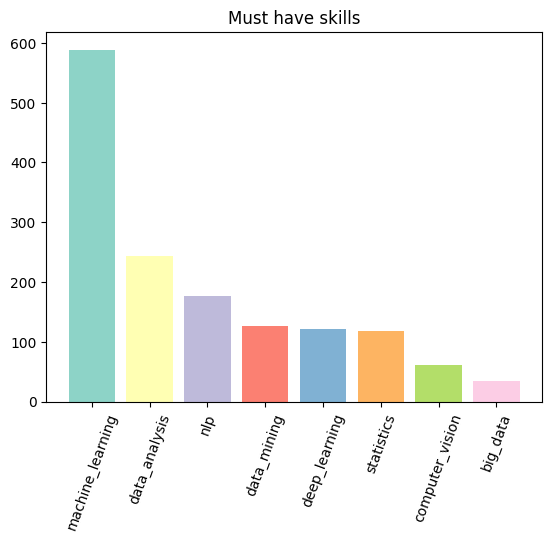

In [23]:
# Plot the most important skills.
plt.bar(datascience.keys(),datascience.values(),color=colors)
plt.xticks(rotation=70)
plt.title("Must have skills")
plt.show()

### 3.5.2. Languauges in demand

<>:7: SyntaxWarning: invalid escape sequence '\+'
<>:7: SyntaxWarning: invalid escape sequence '\+'
/var/folders/xn/f22k2n417tddr831ph76t6d80000gn/T/ipykernel_19007/4260431162.py:7: SyntaxWarning: invalid escape sequence '\+'
  languages["c++"]=skl_df["count"][skl_df['skills'].str.contains('c\+', regex=True)].sum()


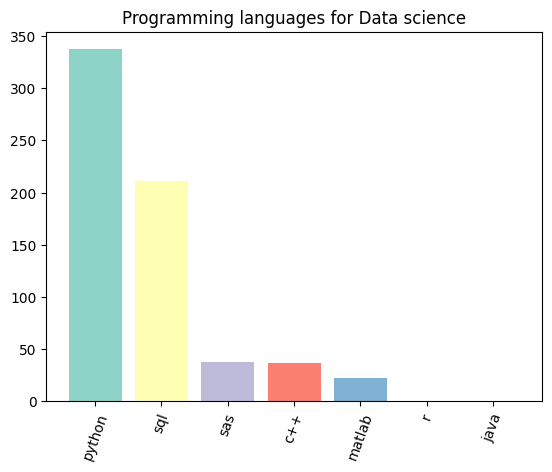

In [28]:
# Language selection
languages={}
languages["python"]=skl_df["count"][skl_df['skills'].str.contains('python', regex=True)].sum()
languages["r"]=skl_df["count"][skl_df['skills'].str.contains('^r$', regex=True)].sum()
languages["matlab"]=skl_df["count"][skl_df['skills'].str.contains('matlab', regex=True)].sum()
languages["java"]=skl_df["count"][skl_df['skills'].str.contains('java$', regex=True)].sum()
languages["c++"]=skl_df["count"][skl_df['skills'].str.contains('c\+', regex=True)].sum()
languages["sas"]=skl_df["count"][skl_df['skills'].str.contains('sas', regex=True)].sum()

#to identify the Sql first and then seperate the nosql from the list
sql=skl_df[skl_df['skills'].str.contains('sql', regex=True)]
languages["sql"]=sql["count"][~sql['skills'].str.contains('no', regex=True)].sum()

#to sort the dictionary
languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(languages.keys(),languages.values(),color=colors)
plt.xticks(rotation=70)
plt.title("Programming languages for Data science")
plt.show()

### 3.5.3. Deep learning frameworks

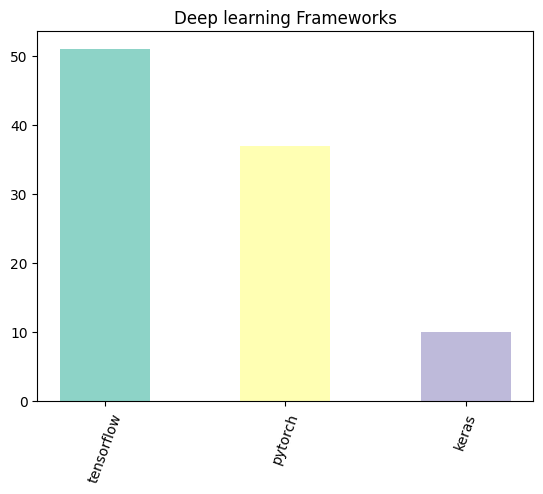

In [29]:
# Framework selection
frameworks={}
frameworks['tensorflow']=skl_df["count"][skl_df['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=skl_df["count"][skl_df['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=skl_df["count"][skl_df['skills'].str.contains('torch', regex=True)].sum()

# Sort
frameworks=dict(sorted(frameworks.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(frameworks.keys(),frameworks.values(),color=colors,width=.5)
plt.xticks(rotation=70)
plt.title("Deep learning Frameworks")
plt.show()

### 3.5.5. Clouds for Data Science

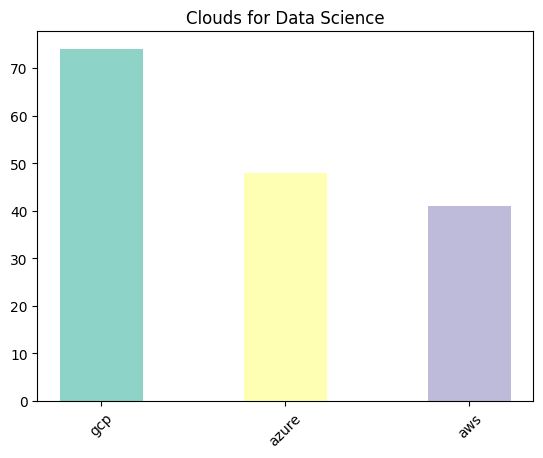

In [30]:
#Providers selection
cloud={}
cloud['aws']=skl_df["count"][skl_df['skills'].str.contains('aws', regex=True)].sum()
cloud['azure']=skl_df["count"][skl_df['skills'].str.contains('azure', regex=True)].sum()
cloud['gcp']=skl_df["count"][skl_df['skills'].str.contains('gcp')].sum()

# Sort
cloud=dict(sorted(cloud.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(cloud.keys(),cloud.values(),color=colors,width=.45)
plt.xticks(rotation=45)
plt.title("Clouds for Data Science")
plt.show()

### 3.5.6. Big data technologies for Data science

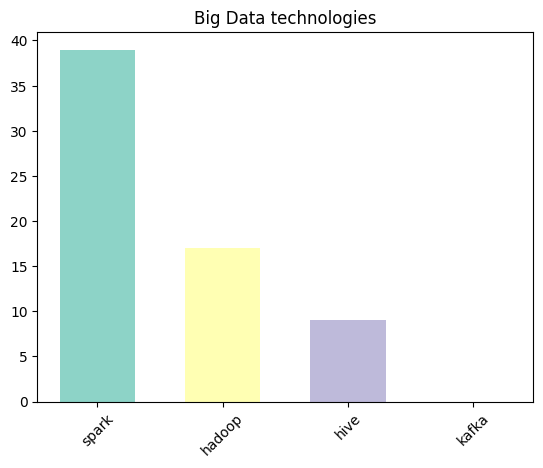

In [31]:
# Tech Selection
bigdata={}
bigdata["spark"]=skl_df["count"][skl_df['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=skl_df["count"][skl_df['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"]=skl_df["count"][skl_df['skills'].str.contains('hive', regex=True)].sum()
bigdata["kafka"]=skl_df["count"][skl_df['skills'].str.contains('kafka', regex=True)].sum()

# Sort
bigdata=dict(sorted(bigdata.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(bigdata.keys(),bigdata.values(),color=colors,width=0.6)
plt.xticks(rotation=45)
plt.title("Big Data technologies")
plt.show()

### 3.5.7. Data Visualization tools

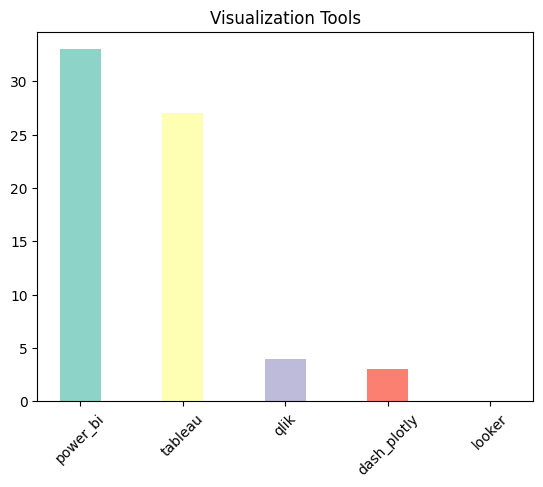

In [32]:
# tools selection
tools={}
tools["tableau"]=skl_df["count"][skl_df['skills'].str.contains('tableau', regex=True)].sum()
tools["power_bi"]=skl_df["count"][skl_df['skills'].str.contains('power bi', regex=True)].sum()
tools["looker"] = skl_df["count"][skl_df['skills'].str.contains('looker', regex=True)].sum()
tools["qlik"] = skl_df["count"][skl_df['skills'].str.contains('qlik', regex=True)].sum()
tools["dash_plotly"] = skl_df["count"][skl_df['skills'].str.contains('plotly|dash', regex=True)].sum()

# Sort
tools=dict(sorted(tools.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(tools.keys(),tools.values(),color=colors,width=(0.4))
plt.xticks(rotation=45)
plt.title("Visualization Tools")
plt.show()

### Let's now cluster the locations of the jobs using dimensionality reduction techniques

**Description:**

In this analysis, we aim to cluster job postings based on their **locations** by applying **dimensionality reduction** and **clustering** techniques.

**Steps:**

1. **Data Preparation:**  
   - Start with a sample DataFrame containing roles, companies, locations, experience, and skills.
   - Clean the `locations` column by removing square brackets.

2. **Vectorization:**  
   - Convert the cleaned location strings into numerical feature vectors using `CountVectorizer`.

3. **Dimensionality Reduction:**  
   - Apply **PCA** (Principal Component Analysis) to reduce the location vectors to 2 dimensions.
   - Apply **UMAP** (Uniform Manifold Approximation and Projection) for a nonlinear 2D embedding.

4. **Clustering:**  
   - Perform **KMeans clustering** on both the PCA and UMAP embeddings.

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/Users/yihuang/projects/data_science/Week_3/myenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
# Step 1: Clean locations (remove brackets if needed)
# Step 1: Convert location list to string
DS_jobs_df['locations_clean'] = DS_jobs_df['locations'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))

# Force locations_clean to be string
DS_jobs_df['locations_clean'] = DS_jobs_df['locations_clean'].astype(str)

# Step 2: Vectorize locations
vectorizer = CountVectorizer()
location_vectors = vectorizer.fit_transform(DS_jobs_df['locations_clean']).toarray()


In [35]:
## vector representation of the locations. Here problem is the vectors are high dimensional. So, let's reduce the dimensions of the vectors
location_vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(978, 99))

In [36]:
location_vectors[location_vectors>0]

array([1, 1, 1, ..., 1, 1, 1], shape=(1577,))

/Users/yihuang/projects/data_science/Week_3/myenv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/yihuang/projects/data_science/Week_3/myenv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


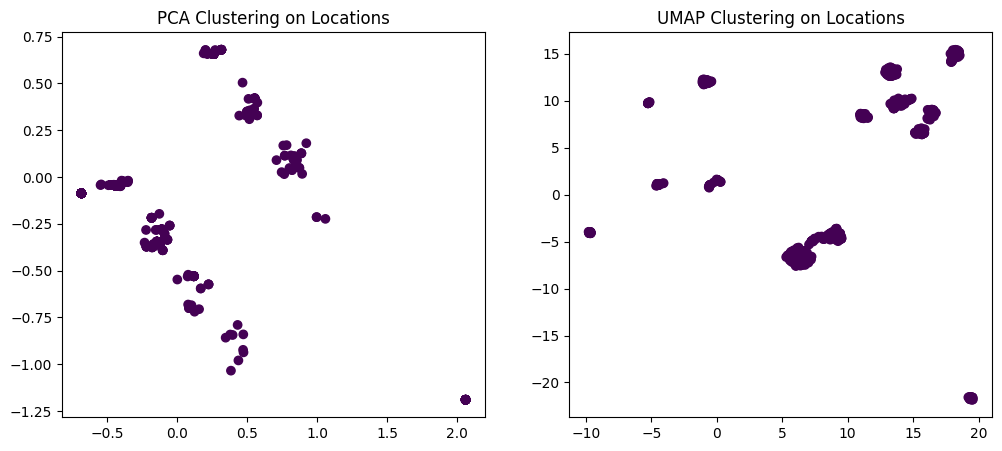

In [37]:
# Step 3a: PCA reduction
pca = PCA(n_components=2)
location_pca = pca.fit_transform(location_vectors)

# Step 3b: UMAP reduction
reducer = umap.UMAP(n_components=2, random_state=42)
location_umap = reducer.fit_transform(location_vectors)

# Step 4: Clustering (example with KMeans)
kmeans_pca = KMeans(n_clusters=1, random_state=42).fit(location_pca)  # 1 cluster because same location
kmeans_umap = KMeans(n_clusters=1, random_state=42).fit(location_umap)

# Step 5: Visualization
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# PCA plot
axs[0].scatter(location_pca[:, 0], location_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis')
axs[0].set_title('PCA Clustering on Locations')

# UMAP plot
axs[1].scatter(location_umap[:, 0], location_umap[:, 1], c=kmeans_umap.labels_, cmap='viridis')
axs[1].set_title('UMAP Clustering on Locations')

plt.show()
